In [71]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import time

In [ ]:
!unzip Dataset.zip

In [73]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'Dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'Dataset/validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 120 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [74]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [75]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 128)      

In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
start_time = time.time()
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)
end_time = time.time()
training_time = end_time - start_time
print("\n")
print("Training time = ", training_time)

Epoch 1/20
4/4 [==============================] - 7s 683ms/step - loss: 0.9407 - accuracy: 0.4917 - val_loss: 0.6929 - val_accuracy: 0.5250
Epoch 2/20
4/4 [==============================] - 1s 127ms/step - loss: 0.6918 - accuracy: 0.5500 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 0s 90ms/step - loss: 0.6780 - accuracy: 0.5000 - val_loss: 0.6793 - val_accuracy: 0.5500
Epoch 4/20
4/4 [==============================] - 1s 109ms/step - loss: 0.6408 - accuracy: 0.6000 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 1s 115ms/step - loss: 0.5889 - accuracy: 0.6583 - val_loss: 0.7933 - val_accuracy: 0.5250
Epoch 6/20
4/4 [==============================] - 1s 107ms/step - loss: 0.5516 - accuracy: 0.7167 - val_loss: 0.6865 - val_accuracy: 0.5750
Epoch 7/20
4/4 [==============================] - 1s 119ms/step - loss: 0.4726 - accuracy: 0.7833 - val_loss: 0.6958 - val_accuracy: 0.6500
Epoch 8/20
4/4 [=====

1/1 [==============================] - 0s 249ms/step


array([[0.]], dtype=float32)

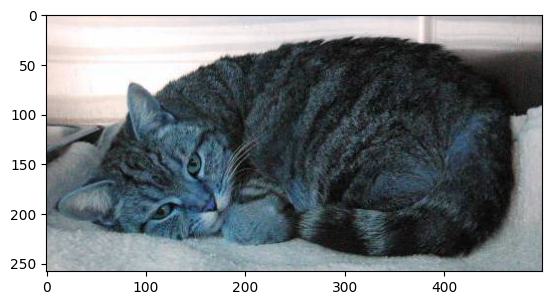

In [79]:
test_img1 = cv2.imread('/content/Dataset/test/cat/cat.76.jpg')
plt.imshow(test_img1)
test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape((1,256,256,3))
model.predict(test_input1)

1/1 [==============================] - 0s 52ms/step


array([[1.]], dtype=float32)

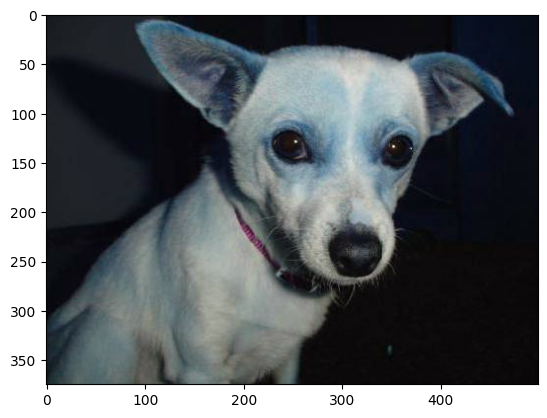

In [84]:
test_img2 = cv2.imread('/content/Dataset/test/dog/dog.104.jpg')
plt.imshow(test_img2)
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))
model.predict(test_input2)

In [82]:
# Load test dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory='Dataset/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Preprocess test data
test_ds = test_ds.map(process)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_ds)
# Log testing accuracy
tf.summary.scalar('test_accuracy', test_accuracy, step=60)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Found 40 files belonging to 2 classes.
2/2 [==============================] - 0s 16ms/step - loss: 1.5653 - accuracy: 0.6500
Test Loss: 1.565338134765625
Test Accuracy: 0.6499999761581421


1/1 [==============================] - 0s 28ms/step


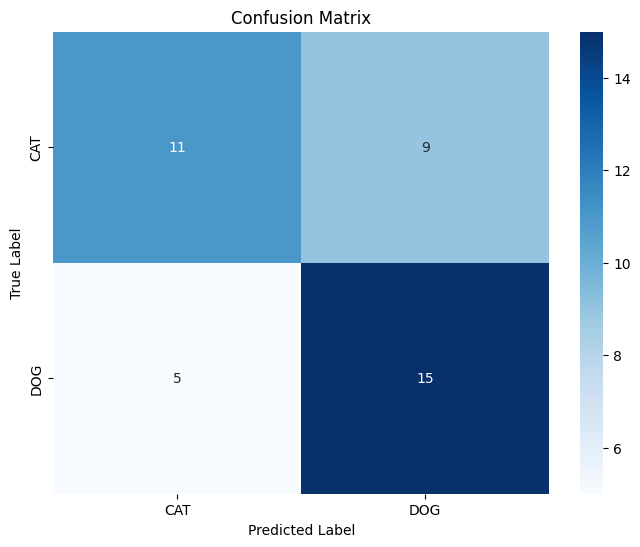

In [85]:
# Function to get predictions
def get_predictions(model, dataset):
    predictions = []
    labels = []
    for images, labels_batch in dataset:
        predictions_batch = model.predict(images)
        predictions.extend(np.round(predictions_batch).astype(int))
        labels.extend(labels_batch.numpy())
    return np.array(predictions).flatten(), np.array(labels)

# Get predictions for test data
test_predictions, test_labels = get_predictions(model, test_ds)

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CAT', 'DOG'], yticklabels=['CAT', 'DOG'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()